In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Непрерывное распределение

1.Сгенерируем выборку объёма 1000 из Гамма-распределения (с параметром $a$):

In [56]:
#a = 1.99
a = 2
gamma_rv = sts.gamma(a)
sample = gamma_rv.rvs(size=1000)

2.Построим гистограмму выборки и теоретическую плотность распределения:

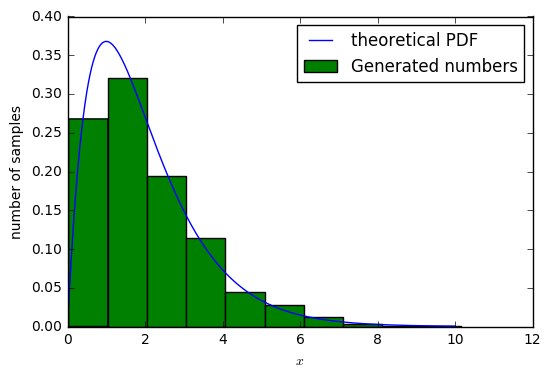

In [57]:
x = np.linspace(0,10,1000)
cdf = gamma_rv.pdf(x)
plt.plot(x, cdf, label='theoretical PDF')

plt.hist(sample, normed=True, label='Generated numbers')

plt.ylabel('number of samples')
plt.xlabel('$x$')
plt.legend(loc='upper right')

# Оценка распределения выборочного среднего случайной величины при разных объёмах выборок

1.Создадим функцию, которая будет возвращать гистограмму выборочных средних из выборки длинны $n$ и график плотности нормального распределения выборочных средних:

In [117]:
# Параметр n - длина выборки.
def f(n):
    # создаем и заполняем массив для 1000 выборок объёма n
    g_in = np.eye(1000,n)
    i = 0
    while i < 1000:
        j = 0
        while j < n:
            g_in[i,j] = gamma_rv.rvs(size=1)
            j += 1
        i += 1
    # находим выборочное среднее
    g_avg = g_in.mean(axis=1)
    # генерируем нормальное распределение согласно ЦПТ
    # gamma_rv.mean() - среднее
    # (gamma_rv.std()/np.sqrt(1000.0)) - дисперсия
    x = np.linspace(0,5,1000)
    cdf = sts.norm(gamma_rv.mean(), (gamma_rv.std()/np.sqrt(float(n)))).pdf(x) # вычисление параметров норм. распределения
    plt.plot(x, cdf, label='theoretical PDF')
    plt.hist(g_avg, normed=True, label='Generated numbers')

    plt.ylabel('number of samples')
    plt.xlabel('$x$')
    plt.legend(loc='upper right')
    # рисуем картинку
    return plt.show()

2.Используем созданную функцию для анализа выборок длины: 5, 10, 50.
Длина выбрана для наглядности (поскольку Гамма-распределение сильно отличается от нормального).

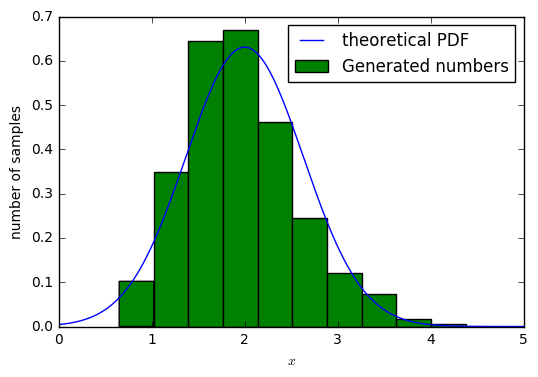

In [126]:
f(5) # для выборки длиной 5

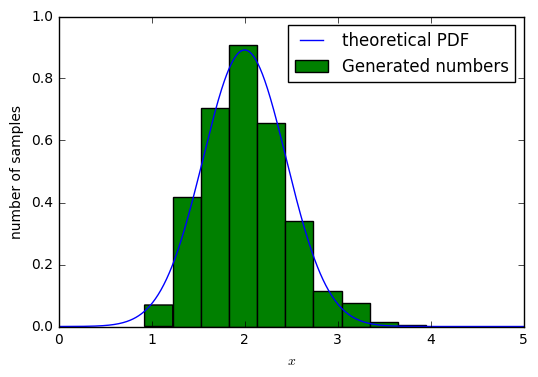

In [125]:
f(10)

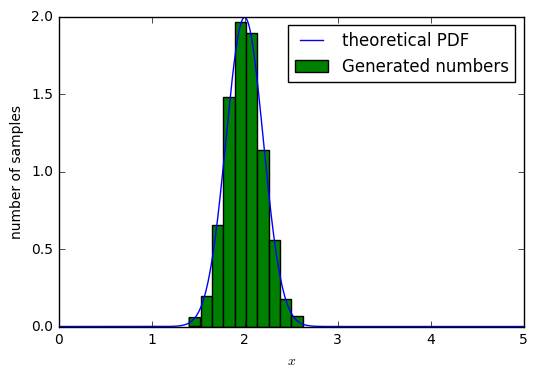

In [124]:
f(50)

Вывод:
точность аппроксимации распределения выборочных средних нормальным увеличивается с ростом n.